In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import transforms
import torchvision.transforms as T
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from Model import *

c:\Users\zhuang\AppData\Local\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] La procédure spécifiée est introuvable'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# Load dataset

c:\Users\zhuang\AppData\Local\anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


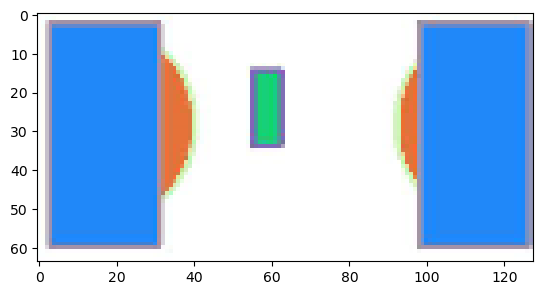

In [2]:
paired_dir = '/Users/zhuang/Documents/data_all/'

image_transform = transforms.Compose([
    transforms.ToTensor(),
    crop_normal(),
    transforms.Resize((64, 128)),
])

dataset = datasets.ImageFolder(root=paired_dir, transform=image_transform)
classes = dataset.find_classes(paired_dir)[0]
image = dataset[np.random.randint(0,len(dataset))][0]
t = T.ToPILImage()
plt.imshow(t(image))


In [3]:
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Create the data loaders for training and validation
train_dataloader = torch.utils.data.DataLoader(
    train_data,
    batch_size=200,
    shuffle=True
)

test_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=200,
    shuffle=False
)

# Learning phase

In [4]:
class LeNet2(nn.Module):
    def __init__(self):
        super(LeNet2, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=8, stride=1, padding="same")
        self.conv2 = nn.Conv2d(4, 8, kernel_size=4, stride=1, padding="same")
        self.conv3 = nn.Conv2d(8, 16, kernel_size=4, stride=1,  padding="same")
        self.fc1 = nn.Linear(2048,1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 4)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = -F.max_pool2d(-x, 2)
        x = F.relu(self.conv2(x))
        x = -F.max_pool2d(-x, 2)
        x = F.relu(self.conv3(x))
        x = -F.max_pool2d(-x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# Model
epochs = 20
loss_fn = nn.CrossEntropyLoss()
model = LeNet2().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
print(model)

# trainning
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

# save model
torch.save(model.state_dict(), f"./models/model_2image_all")
print("Done!")

LeNet2(
  (conv1): Conv2d(3, 4, kernel_size=(8, 8), stride=(1, 1), padding=same)
  (conv2): Conv2d(4, 8, kernel_size=(4, 4), stride=(1, 1), padding=same)
  (conv3): Conv2d(8, 16, kernel_size=(4, 4), stride=(1, 1), padding=same)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
)
Epoch 1
-------------------------------


c:\Users\zhuang\AppData\Local\anaconda3\lib\site-packages\torch\nn\modules\conv.py:453: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\aten\src\ATen\native\Convolution.cpp:883.)
  return F.conv2d(input, weight, bias, self.stride,


loss: 1.384310  [  200/ 3200]
Test Error: 
 Accuracy: 61.8%, Avg loss: 0.951512 

Epoch 2
-------------------------------
loss: 0.858606  [  200/ 3200]
Test Error: 
 Accuracy: 74.5%, Avg loss: 0.662161 

Epoch 3
-------------------------------
loss: 0.696061  [  200/ 3200]
Test Error: 
 Accuracy: 83.0%, Avg loss: 0.441301 

Epoch 4
-------------------------------
loss: 0.546963  [  200/ 3200]
Test Error: 
 Accuracy: 87.9%, Avg loss: 0.327475 

Epoch 5
-------------------------------
loss: 0.314796  [  200/ 3200]
Test Error: 
 Accuracy: 91.1%, Avg loss: 0.224077 

Epoch 6
-------------------------------
loss: 0.215087  [  200/ 3200]
Test Error: 
 Accuracy: 85.1%, Avg loss: 0.347589 

Epoch 7
-------------------------------
loss: 0.468110  [  200/ 3200]
Test Error: 
 Accuracy: 88.5%, Avg loss: 0.271291 

Epoch 8
-------------------------------
loss: 0.273528  [  200/ 3200]
Test Error: 
 Accuracy: 91.6%, Avg loss: 0.230203 

Epoch 9
-------------------------------
loss: 0.253637  [  200/ 

# Confusion Matrix (with all prediction)

In [4]:
model = LeNet2()
model.load_state_dict(torch.load('models/model_2image_all'))

<All keys matched successfully>

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score
import matplotlib.pyplot as plt

# Display Train: Matrix Confusion
y_true_train = []
y_pred_train = []
for X, y in train_dataloader:
    y_true_train.extend(y.data.cpu().numpy())
    X, y = X.to(device), y.to(device)
    pred = model(X)
    y_pred_train.extend(pred.argmax(1).data.cpu().numpy())

# Display Train: Matrix Confusion
y_true_test = []
y_pred_test = []
for X, y in test_dataloader:
    y_true_test.extend(y.data.cpu().numpy())
    X, y = X.to(device), y.to(device)
    pred = model(X)
    y_pred_test.extend(pred.argmax(1).data.cpu().numpy())

y_true_train = np.array(y_true_train)
y_pred_train = np.array(y_pred_train)
y_true_test = np.array(y_true_test)
y_pred_test = np.array(y_pred_test)

Train performance: 0.951
========= Precision ==============
alignBottom : 0.999
alignLeft : 0.969
alignRight : 0.945
alignTop : 0.903


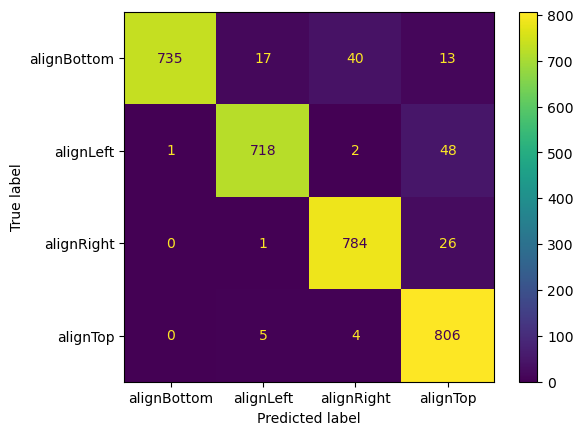

In [6]:
# Matrix train
print("Train performance: %.3f" % np.where(y_true_train == y_pred_train, 1, 0).mean())
print("========= Precision ==============")
for a,b in zip(classes,precision_score(y_true_train, y_pred_train, average=None)):
    print(f'{a} : {b:.3f}')
conf_matrix = confusion_matrix(y_true_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = classes)
disp.plot()
plt.savefig('../Rapports/images/Train/Train_all.png')
plt.show()

Test performance: 0.939
========= Precision ==============
alignBottom : 0.979
alignLeft : 0.938
alignRight : 0.954
alignTop : 0.887


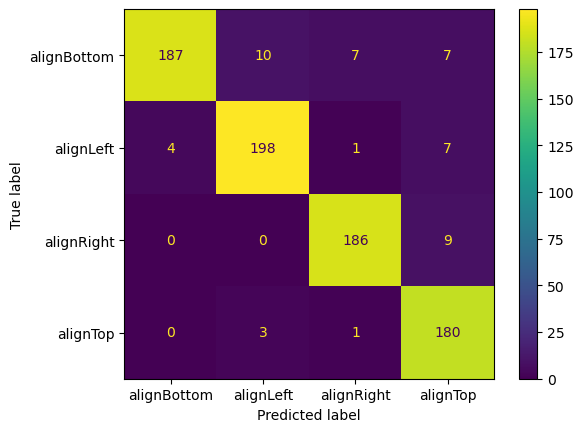

In [7]:
# Matrix test
print("Test performance: %.3f" % np.where(y_true_test == y_pred_test, 1, 0).mean())
print("========= Precision ==============")
for a,b in zip(classes,precision_score(y_true_test, y_pred_test, average=None)):
    print(f'{a} : {b:.3f}')
conf_matrix = confusion_matrix(y_true_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = classes)
disp.plot()
plt.savefig('../Rapports/images/Test/Test_all.png')
plt.show()

# Matrix Confusion (with only good predictions)

Accuracy avant: 0.939
Accuracy après: 0.994
pred restantes: 684
pred supprimees: 116
pourcentage restant: 0.855


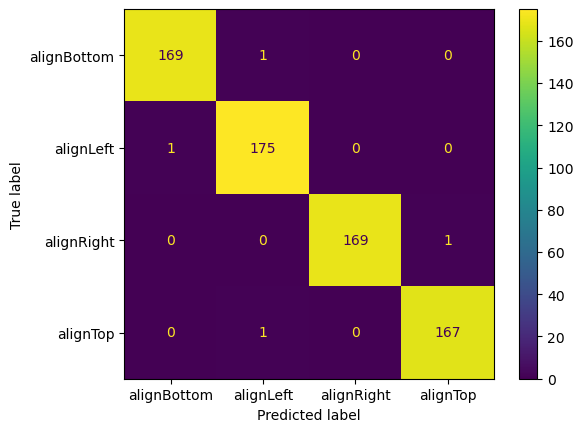

In [13]:
import numpy as np
#Used to calculate the confusion matrix
y_true = []
y_pred = []

for X, y in test_dataloader:
    y_true.extend(y.data.cpu().numpy())
    X, y = X.to(device), y.to(device)
    pred = model(X)
    pred = pred.softmax(dim=1)
    y_pred.extend(pred.data.cpu().numpy())
    
y_pred = np.array(y_pred)
y_true = np.array(y_true)
seuil = 0.90
indices = y_pred.max(1) > seuil

print("Accuracy avant: %.3f" % np.where(y_pred.argmax(1) == y_true, 1, 0).mean())
y_pred = y_pred[indices].argmax(1)
y_true = y_true[indices]
print("Accuracy après: %.3f" % np.where(y_pred == y_true, 1, 0).mean())

conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = classes)
disp.plot()

print("pred restantes: %d" % sum(indices))
print("pred supprimees: %d" %  sum(False == indices))
print("pourcentage restant: %.3f" % (sum(indices)/len(indices)))


plt.show()



### Test

In [12]:
classif = LeNet2()
tak2Image2Image=True
process = classif.process_2image
classif.load_state_dict(torch.load("models/model_2image_all")) # loading parameters
model_reco = Model(classif, process, tak2Image2Image=tak2Image2Image)

# Display Train: Matrix Confusion
y_true_train = []
y_pred_train = []
for X, y in test_dataloader:
    y_true_train.extend(y.data.cpu().numpy())
    X, y = X.to(device), y.to(device)
    print(f'{X.shape = }')
    pred = classif(X)
    y_pred_train.extend(pred.argmax(1).data.cpu().numpy())
    for px in X:
        print(f'{px = }')
        a, b = torch.split(px, )


y_true_train = np.array(y_true_train)
y_pred_train = np.array(y_pred_train)

X.shape = torch.Size([200, 3, 64, 128])


Train performance: 0.939
========= Precision ==============
alignBottom : 0.979
alignLeft : 0.938
alignRight : 0.954
alignTop : 0.887


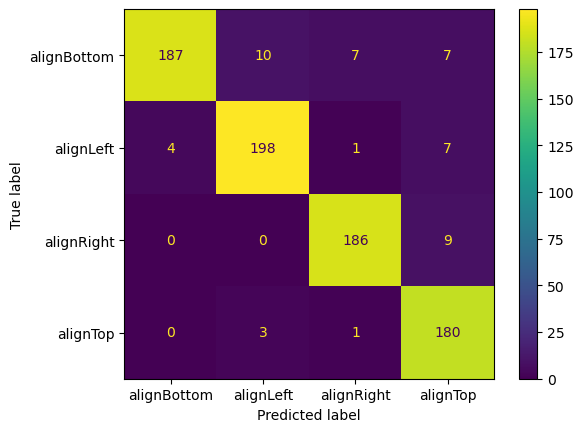

In [11]:
# Matrix train
print("Train performance: %.3f" % np.where(y_true_train == y_pred_train, 1, 0).mean())
print("========= Precision ==============")
for a,b in zip(classes,precision_score(y_true_train, y_pred_train, average=None)):
    print(f'{a} : {b:.3f}')
conf_matrix = confusion_matrix(y_true_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = classes)
disp.plot()
plt.savefig('../Rapports/images/Train/Train_all.png')
plt.show()